# As you pointed out, there's a lot of correlation here, but because charges often get stacked onto one another.

### I couldn't see the use of making Murder and Robbery into categories (One Hot).  How does that help to predict property crime?  Is the fact that a murder or robbery has occurred in a town an accurate way to predict property crime?  How about actual numbers?  So, I discarded Thinkful's suggestion.  Population squared seemed pretty useless too.  

### We have weird distributions here, which should be expected: rates of all crimes should be clustered down low, as they are.  You'll see that I dealt with outliers and such (NYC) by scaling rather than winsorizing.  I wanted the ratios of certain crimes per population to remain the same.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 50)
pd.options.display.float_format = '{:.3f}'.format

%matplotlib inline

In [13]:
features = pd.read_csv("feats.csv")
features.head()

,Population,Murder,Rape,Robbery,Aggr Assault,Property Crime,Pop Squared
0,1861,0,0,0,0,12,3463321
1,2577,0,0,0,3,24,6640929
2,2846,0,0,0,3,16,8099716
3,97956,8,30,227,526,4090,9595377936
4,6388,0,3,4,16,223,40806544


In [12]:
# Instantiate and fit the model.
regr = linear_model.LinearRegression()
Y = features["Property Crime"]#.values.reshape(-1, 1)
X = features[["Population", "Pop Squared", "Robbery", "Murder", "Rape", "Aggr Assault"]]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 2.14485192e-02 -9.47299558e-08 -2.28350575e-01 -9.42138999e+00
  3.93314299e+01  2.58514428e+00]

Intercept: 
 -59.8016935633006

R-squared:
0.9076716283462678


In [14]:
# Instantiate and fit the model.
regr = linear_model.LinearRegression()
Y = features["Property Crime"].values.reshape(-1, 1)
X = features[["Population", "Pop Squared", "Robbery", "Murder", "Rape", "Aggr Assault"]]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 2.14485192e-02 -9.47299558e-08 -2.28350575e-01 -9.42138999e+00
   3.93314299e+01  2.58514428e+00]]

Intercept: 
 [-59.80169356]

R-squared:
0.9076716283462678


### Obviously we have a bunch of multicollinearity.  In this case it's not a problem since we're just looking for prediction.  Also, it looks like population squared is useless, I'm dropping it.

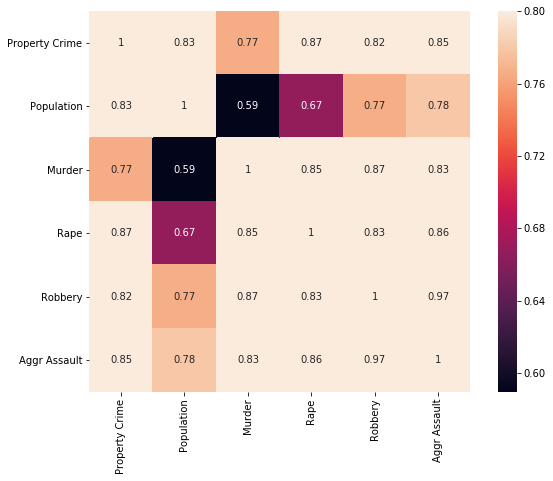

In [4]:
# dropping population squared, it's dead weight
df_corr = features.loc[:, ["Property Crime", "Population", "Murder", "Rape", "Robbery", "Aggr Assault"]]

# Correlation matrix
corrmat = df_corr.corr()
#print(corrmat)

f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.show()

In [10]:
X_plot = list(features.columns)[:5]
Y_plot = 'Property Crime'
colors = ["chocolate", "firebrick", "darkslategrey", "steelblue", "darkslateblue"]

In [11]:
# Define the scatterplot function
def plot_scatter(frame, X, Y):
    fig, axes = plt.subplots(len(X), 1, figsize=(8, 20))
    for var in X:
        idx = X.index(var)
        sns.regplot(y=frame[Y], x=frame[var], ax=axes[idx], color=colors[idx])
        
    plt.tight_layout()
    plt.show()

### These relationships look linear-ish.  However, there's nothing even close to a Normal distribution in any of the, which can easily be seen by the tight clustering near the origin.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


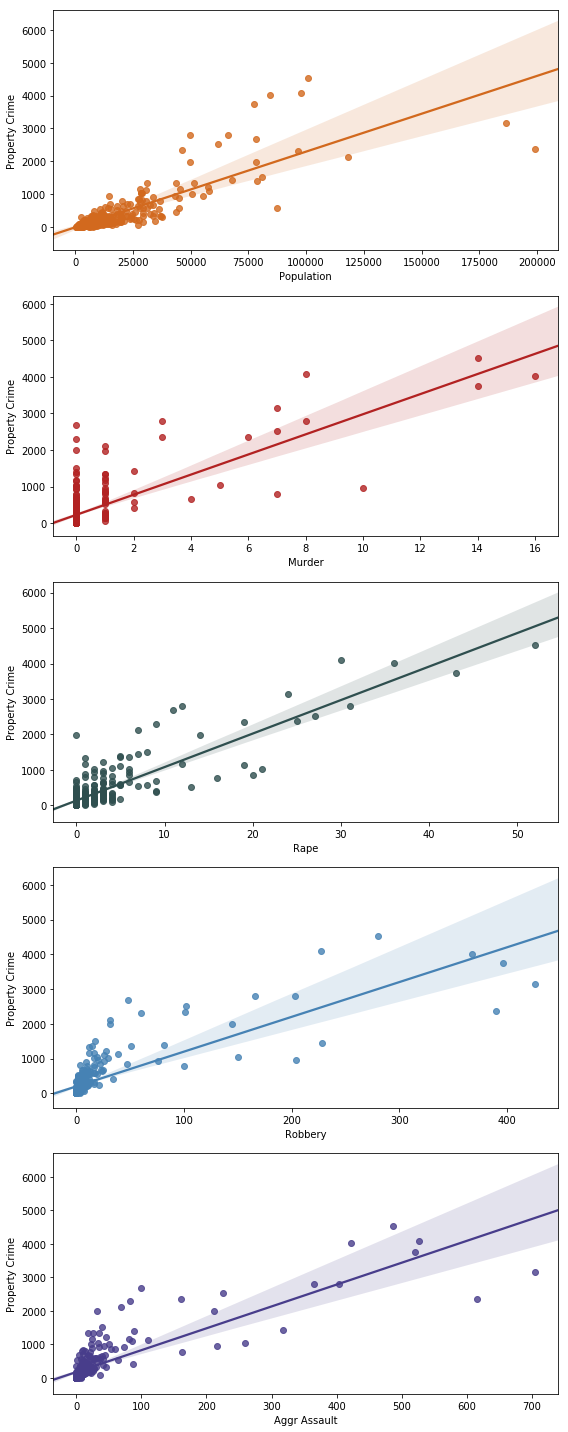

In [12]:
plot_scatter(features, X_plot, Y_plot)

### The residuals look pretty good too, considering the dataset.

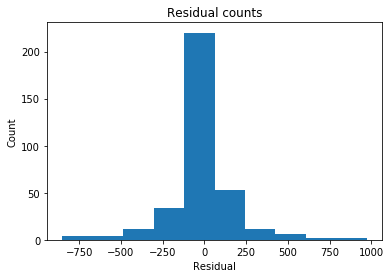

In [8]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = features["Property Crime"]

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### This looks ok, though having the points not so clustered to the left might be nice.  It does, however, reflect the distributions of the data.

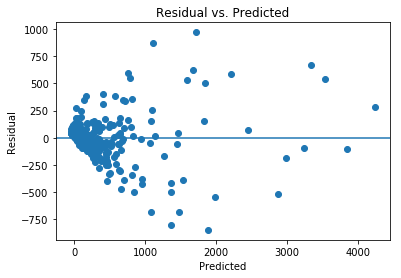

In [9]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()